# GlandsFinderDetector #

In this file, I explore different approaches to training a YOLO network for gland detection. I evaluate various color standards and assess the impact of data augmentation on model performance. The final output of this file is another script, trainYolo.py, which contains the best-performing approach identified during testing. When we want to train the model, we can simply execute this optimized script.

### Imports and basic function implempentation ###

In [2]:
from PIL import Image
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None
import shutil
%matplotlib inline
from IPython.display import display
import matplotlib.image as mpimg
import math
from ultralytics import YOLO
import os
from matplotlib import pyplot as plt


In [6]:
def display_files(path, filenames, dpi=450):
    files = [os.path.join(path, f) for f in filenames if os.path.exists(os.path.join(path, f))]
    n = len(files)
    if n == 0:
        print("No files to display.")
        return

    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)
    
    fig = plt.figure(figsize=(cols * 5, rows * 4), dpi=dpi)

    for i, file in enumerate(files):
        ax = fig.add_subplot(rows, cols, i + 1)
        img = mpimg.imread(file)
        ax.imshow(img, interpolation='none') 
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [7]:
def plot_and_resize(results_item, resize_factor):
    img_with_boxes = results_item.plot()
    if img_with_boxes.shape[2] == 3:
        img_with_boxes_rgb = img_with_boxes[..., ::-1]
    img_pil = Image.fromarray(img_with_boxes_rgb)
    width, height = img_pil.size
    new_size = (width // resize_factor, height // resize_factor)
    img_resized = img_pil.resize(new_size, Image.LANCZOS)
    display(img_resized)
    return img_resized

# Basic model training with Clear Data (RGB) #

In [77]:
run_name = "Glands_Finder_Clear_Data"
base_path = f"runs/train/{run_name}"

In [75]:
model = YOLO("yolo11n.pt")

model.train(
    data='../preprocessedData/LearnSet/data.yaml',
    epochs=50,
    imgsz=640,
    project="runs/train",
    name=run_name,
    exist_ok=True
)

New https://pypi.org/project/ultralytics/8.3.111 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.103  Python-3.12.4 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-12700H)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=../preprocessedData/LearnSet/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=Glands_Finder_Clear_Data, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

train: Scanning C:\Users\stszy\jupyterNoteBookNotes\cellDetector\preprocessedData\LearnSet\data\labels\train.cache... 1


KeyboardInterrupt: 

In [5]:
source_path = f"runs/train/{run_name}/weights/best.pt"
destination_path = f"saved_models/{run_name}_best.pt"
os.makedirs("saved_models", exist_ok=True)
shutil.copy(source_path, destination_path)

'saved_models/Glands_Finder_Clear_Data_best.pt'

In [22]:
model = YOLO("saved_models/Glands_Finder_Clear_Data_best.pt")

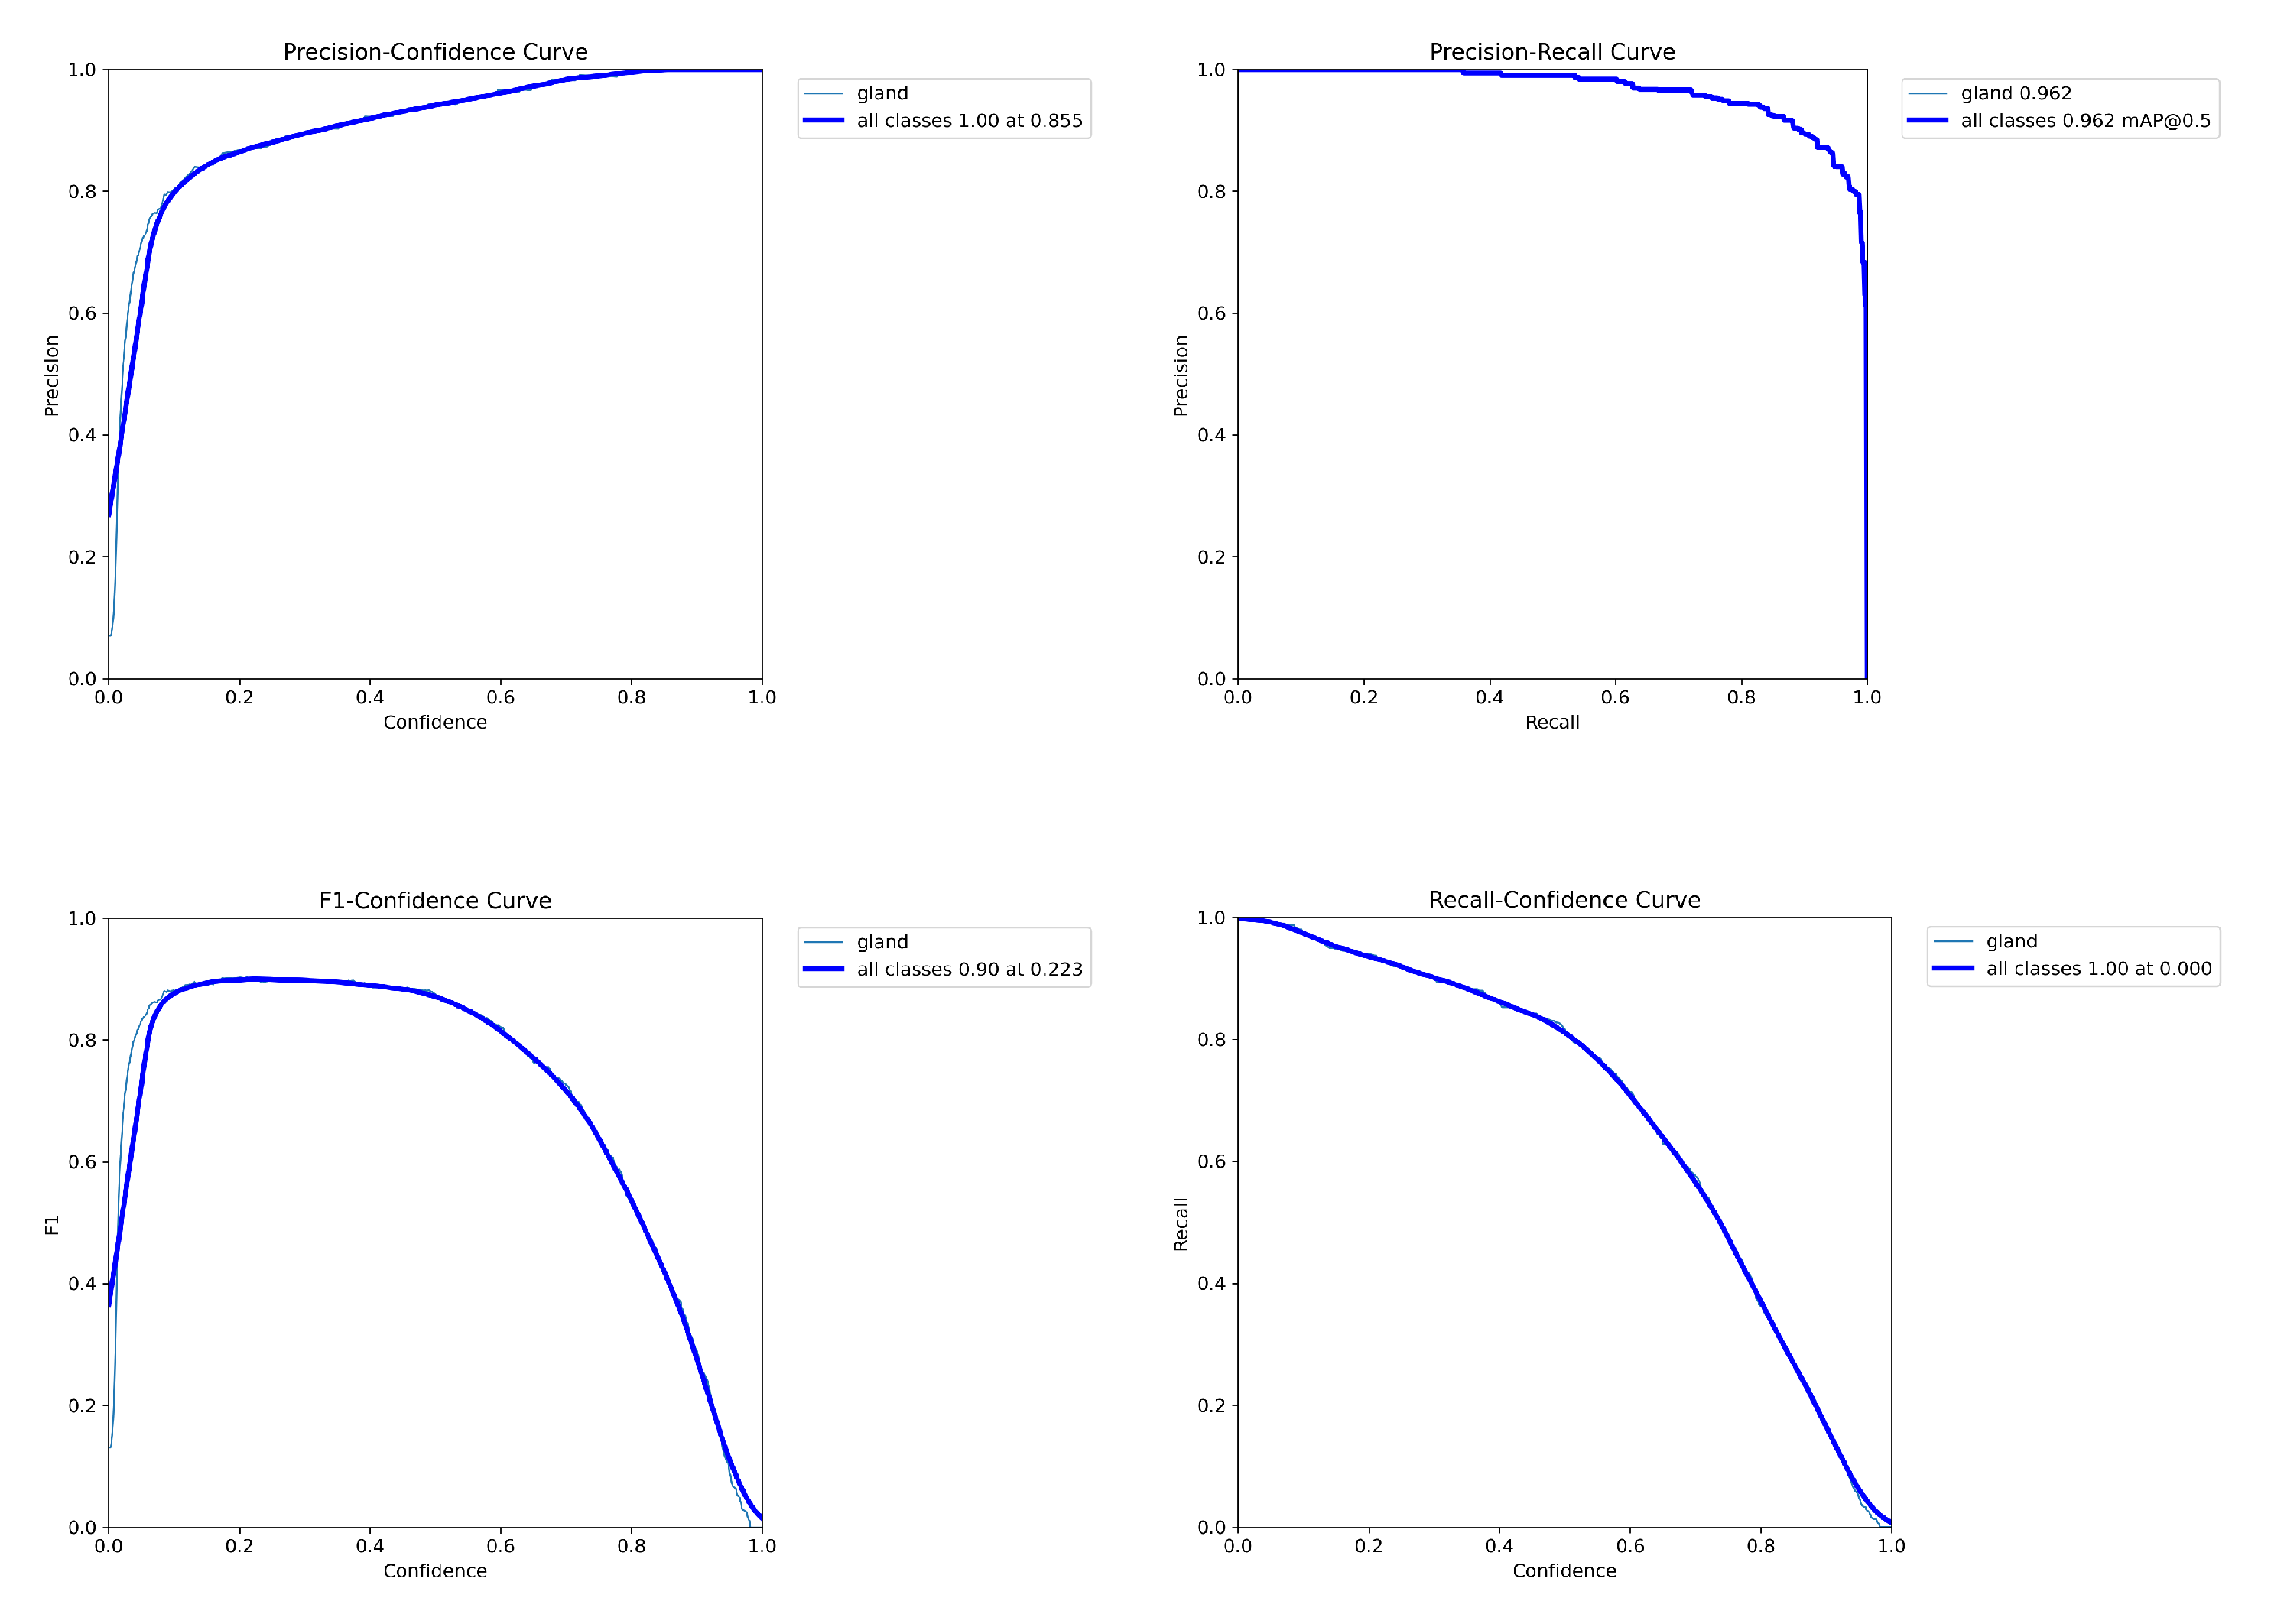

In [79]:
display_files(base_path,['P_curve.png', 'PR_curve.png', 'F1_curve.png', 'R_curve.png'])

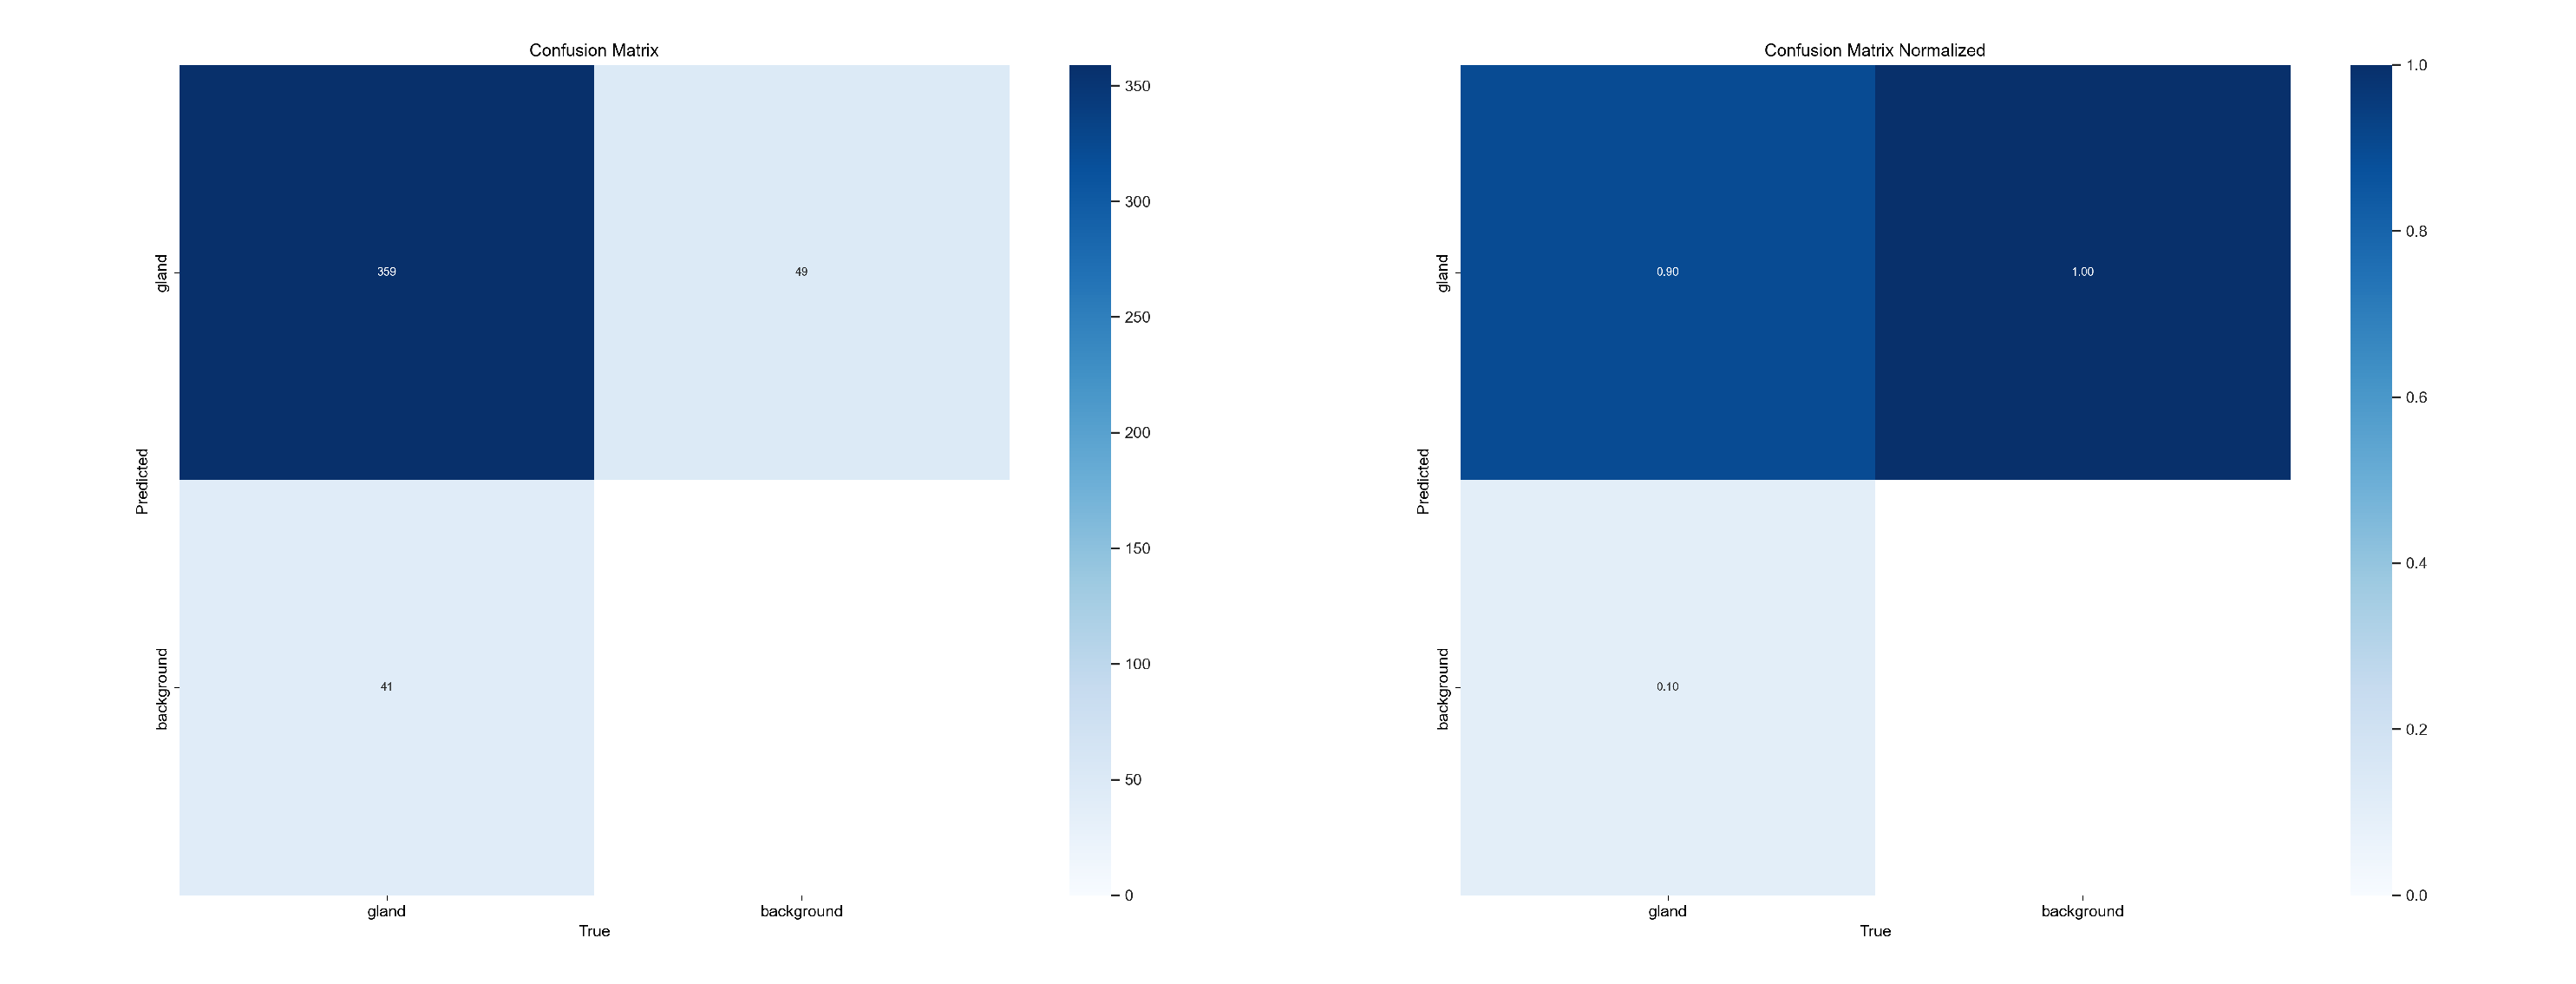

In [124]:
display_files(base_path,['confusion_matrix.png' ,'confusion_matrix_normalized.png'])

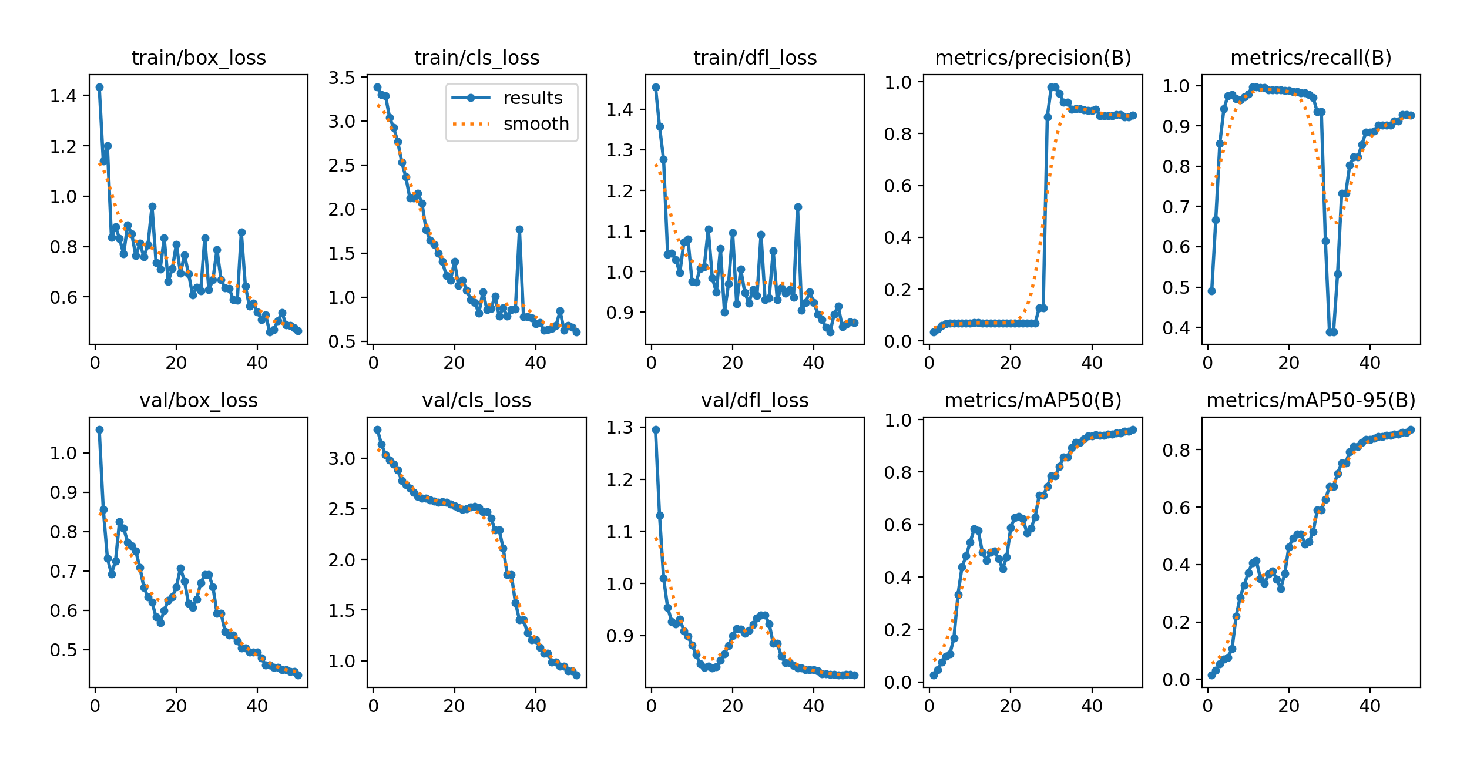

In [96]:
display_files(base_path,['results.png'])

In [23]:
img = Image.open("../preprocessedData/patient0.tif")
results = model(img, conf=0.05)


0: 640x640 79 glands, 73.5ms
Speed: 3.9ms preprocess, 73.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


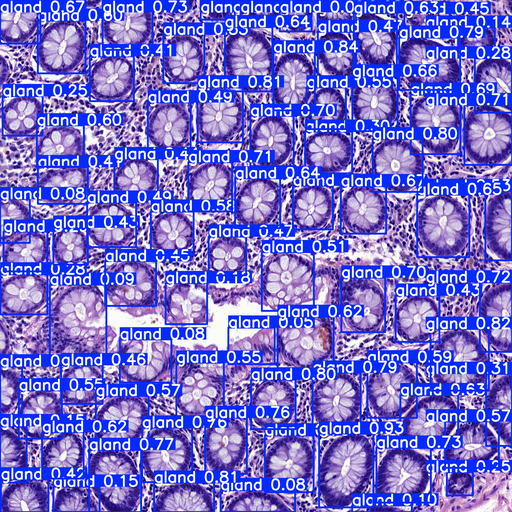

In [24]:
resized_img = plot_and_resize(results[0], 4)

# Basic model training with Clear Data (HSV) #

In [112]:
run_name = "Glands_Finder_Clear_Data_HSV"
base_path = f"runs/train/{run_name}"

In [113]:
model = YOLO("yolo11n.pt")

model.train(
    data='../preprocessedData/LearnSet/dataHsv.yaml',
    epochs=50,
    imgsz=640,
    project="runs/train",
    name=run_name,
    exist_ok=True
)

New https://pypi.org/project/ultralytics/8.3.111 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.103  Python-3.12.4 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-12700H)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=../preprocessedData/LearnSet/dataHsv.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=Glands_Finder_Clear_Data_HSV, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

train: Scanning C:\Users\stszy\jupyterNoteBookNotes\cellDetector\preprocessedData\LearnSet\dataHsv\labels\train.cache..

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\stszy\jupyterNoteBookNotes\cellDetector\preprocessedData\LearnSet\dataHsv\labels\train.cache... 

Plotting labels to runs\train\Glands_Finder_Clear_Data_HSV\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\train\Glands_Finder_Clear_Data_HSV
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.512      3.359      1.499        110        640: 100%|██████████| 2/2 [00:04<00:00,  2.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0156      0.223     0.0104    0.00437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50         0G      1.296      3.322       1.45         29        640: 100%|██████████| 2/2 [00:03<00:00,  1.84
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         19        400     0.0244      0.347     0.0172    0.00955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.372      3.293       1.33        137        640: 100%|██████████| 2/2 [00:03<00:00,  1.90
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         19        400     0.0481      0.685     0.0497     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.9496       3.04      1.078         54        640: 100%|██████████| 2/2 [00:04<00:00,  2.31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0646       0.92      0.098      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.052      2.942      1.103         82        640: 100%|██████████| 2/2 [00:05<00:00,  2.73
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0679      0.968      0.112     0.0731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/50         0G      0.996      2.838      1.104        124        640: 100%|██████████| 2/2 [00:04<00:00,  2.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0675      0.963       0.16      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      0.846      2.596      1.027         76        640: 100%|██████████| 2/2 [00:04<00:00,  2.07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0681       0.97      0.205      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/50         0G     0.9602       2.45      1.111         52        640: 100%|██████████| 2/2 [00:04<00:00,  2.10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0693      0.988      0.325      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/50         0G     0.9069      2.222      1.095         49        640: 100%|██████████| 2/2 [00:04<00:00,  2.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0695       0.99      0.434      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/50         0G     0.9005      2.191      1.013        105        640: 100%|██████████| 2/2 [00:04<00:00,  2.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         19        400     0.0691      0.985      0.532      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.9146      2.258       1.01        118        640: 100%|██████████| 2/2 [00:04<00:00,  2.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0693      0.988      0.595      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/50         0G     0.9846      2.149      1.078         78        640: 100%|██████████| 2/2 [00:04<00:00,  2.10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0698      0.995      0.623      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.9404      1.849      1.102         55        640: 100%|██████████| 2/2 [00:05<00:00,  2.51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         19        400       0.07      0.998       0.59      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/50         0G      1.203      1.793      1.164         55        640: 100%|██████████| 2/2 [00:04<00:00,  2.10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0698      0.995       0.54      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      0.825      1.667      1.011         72        640: 100%|██████████| 2/2 [00:04<00:00,  2.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0698      0.995      0.503      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.8505       1.61     0.9945        122        640: 100%|██████████| 2/2 [00:04<00:00,  2.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0698      0.995      0.488      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/50         0G      1.012      1.508      1.116         62        640: 100%|██████████| 2/2 [00:04<00:00,  2.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0698      0.995      0.484      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.7179       1.35     0.9188         93        640: 100%|██████████| 2/2 [00:04<00:00,  2.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0696      0.993      0.454      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.7511      1.269     0.9762         61        640: 100%|██████████| 2/2 [00:04<00:00,  2.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         19        400     0.0696      0.993      0.464      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.9115      1.444      1.097         28        640: 100%|██████████| 2/2 [00:03<00:00,  1.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400     0.0696      0.993      0.526      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      21/50         0G      0.865      1.195     0.9698        119        640: 100%|██████████| 2/2 [00:04<00:00,  2.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.129       0.94      0.598      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      22/50         0G     0.7919      1.251      1.005         35        640: 100%|██████████| 2/2 [00:04<00:00,  2.07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.611      0.733      0.643      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      23/50         0G     0.7539       1.17     0.9779        106        640: 100%|██████████| 2/2 [00:04<00:00,  2.08
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.687      0.725      0.665      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      24/50         0G     0.6673      1.046     0.9514         74        640: 100%|██████████| 2/2 [00:03<00:00,  1.89
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.677      0.735      0.668      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      25/50         0G     0.7076     0.9998     0.9755         87        640: 100%|██████████| 2/2 [00:04<00:00,  2.06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.751      0.698       0.69       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.7299     0.8931     0.9848         74        640: 100%|██████████| 2/2 [00:04<00:00,  2.02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.779      0.555      0.708      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      27/50         0G     0.8675      1.121      1.093         48        640: 100%|██████████| 2/2 [00:04<00:00,  2.08
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400       0.88      0.256      0.747      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      28/50         0G     0.7169     0.9358      0.963        151        640: 100%|██████████| 2/2 [00:03<00:00,  1.93
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400       0.88      0.256      0.747      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      29/50         0G     0.7773     0.9349     0.9753        101        640: 100%|██████████| 2/2 [00:03<00:00,  1.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.832      0.346      0.748      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      0.769      1.043      1.032         49        640: 100%|██████████| 2/2 [00:04<00:00,  2.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400       0.83       0.39      0.753      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      31/50         0G     0.7057     0.8386     0.9513        109        640: 100%|██████████| 2/2 [00:04<00:00,  2.09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400       0.83       0.39      0.753      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      32/50         0G      0.672     0.9088     0.9802         84        640: 100%|██████████| 2/2 [00:03<00:00,  1.88
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.825       0.54      0.775      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.7181     0.8972      0.976         64        640: 100%|██████████| 2/2 [00:03<00:00,  1.93
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.844      0.756      0.818       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      34/50         0G     0.6796     0.8997     0.9832         65        640: 100%|██████████| 2/2 [00:03<00:00,  1.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.844      0.756      0.818       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6302      0.907      0.953        161        640: 100%|██████████| 2/2 [00:03<00:00,  1.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.847       0.82      0.873      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      36/50         0G     0.9398      1.843      1.206         21        640: 100%|██████████| 2/2 [00:03<00:00,  1.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.841      0.845      0.885      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      37/50         0G     0.7455     0.8367     0.9371         89        640: 100%|██████████| 2/2 [00:03<00:00,  1.92
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.841      0.845      0.885      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      38/50         0G     0.6698     0.8476     0.9606         61        640: 100%|██████████| 2/2 [00:03<00:00,  1.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400       0.83      0.866      0.887      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      39/50         0G     0.6598     0.8312     0.9793         95        640: 100%|██████████| 2/2 [00:03<00:00,  1.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.838       0.88      0.906      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      40/50         0G       0.61     0.7504     0.9524         60        640: 100%|██████████| 2/2 [00:03<00:00,  1.55
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.838       0.88      0.906      0.799
Closing dataloader mosaic


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5532     0.7756     0.9154         91        640: 100%|██████████| 2/2 [00:10<00:00,  5.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         19        400      0.839      0.897      0.911      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5744     0.6717     0.8978         72        640: 100%|██████████| 2/2 [00:07<00:00,  3.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.836      0.902      0.918      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      43/50         0G     0.5711     0.6828     0.8886         68        640: 100%|██████████| 2/2 [00:03<00:00,  1.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.836      0.902      0.918      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      44/50         0G     0.5501     0.7006     0.8689         67        640: 100%|██████████| 2/2 [00:03<00:00,  1.77
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.846      0.907      0.923      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5308     0.7231     0.8987         88        640: 100%|██████████| 2/2 [00:03<00:00,  1.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.846      0.907      0.923      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      46/50         0G     0.5846     0.8948     0.9424         32        640: 100%|██████████| 2/2 [00:03<00:00,  1.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400       0.85      0.912      0.934      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      47/50         0G     0.5523     0.6609     0.8783         59        640: 100%|██████████| 2/2 [00:03<00:00,  1.81
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400       0.85      0.912      0.934      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      48/50         0G     0.5486     0.7187      0.899         41        640: 100%|██████████| 2/2 [00:03<00:00,  1.84
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.873      0.895      0.943      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      49/50         0G     0.5195     0.7112     0.8874         45        640: 100%|██████████| 2/2 [00:03<00:00,  1.64
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.873      0.895      0.943      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      50/50         0G     0.5212     0.6517     0.8838         56        640: 100%|██████████| 2/2 [00:03<00:00,  1.67
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         19        400      0.876      0.902      0.952      0.861

50 epochs completed in 0.101 hours.


Optimizer stripped from runs\train\Glands_Finder_Clear_Data_HSV\weights\last.pt, 5.5MB
Optimizer stripped from runs\train\Glands_Finder_Clear_Data_HSV\weights\best.pt, 5.5MB

Validating runs\train\Glands_Finder_Clear_Data_HSV\weights\best.pt...
Ultralytics 8.3.103  Python-3.12.4 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-12700H)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0


                   all         19        400      0.876      0.902      0.952      0.861
Speed: 1.1ms preprocess, 46.1ms inference, 0.0ms loss, 15.4ms postprocess per image
Results saved to runs\train\Glands_Finder_Clear_Data_HSV


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023348BB56D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [114]:
source_path = f"runs/train/{run_name}/weights/best.pt"
destination_path = f"saved_models/{run_name}_best.pt"
os.makedirs("saved_models", exist_ok=True)
shutil.copy(source_path, destination_path)

'saved_models/Glands_Finder_Clear_Data_HSV_best.pt'

In [116]:
model = YOLO("saved_models/Glands_Finder_Clear_Data_HSV_best.pt")

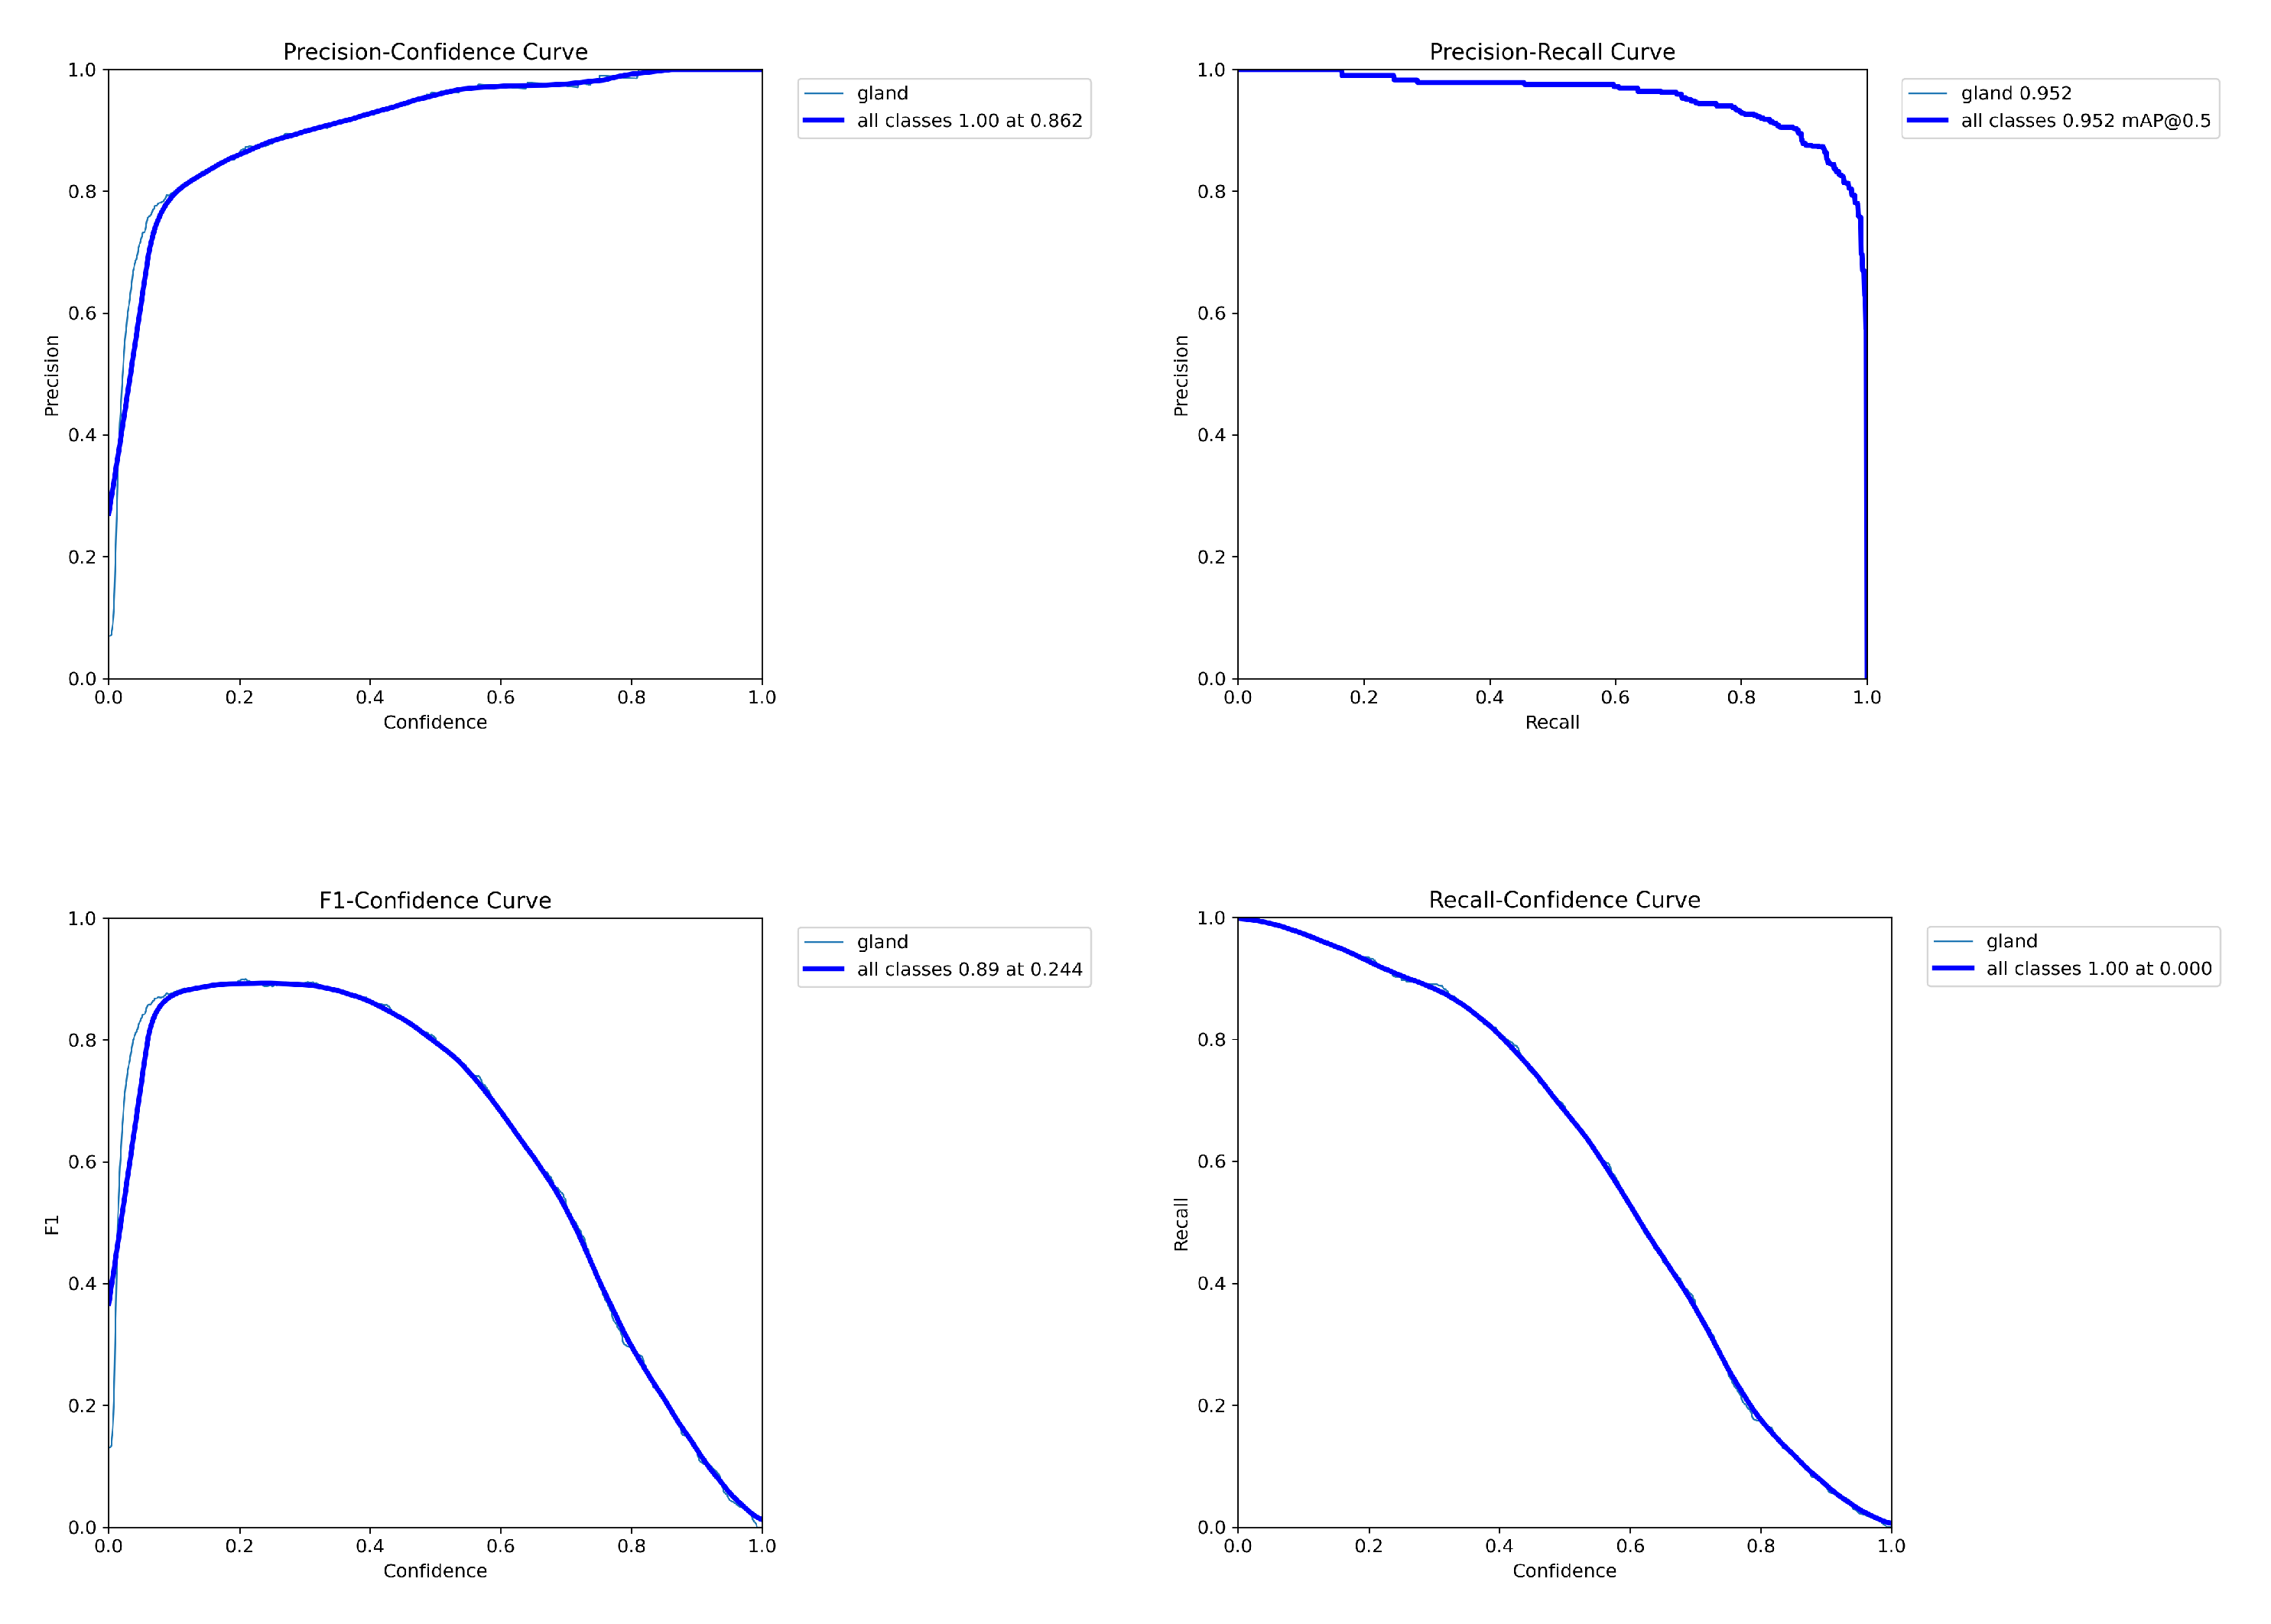

In [117]:
display_files(base_path,['P_curve.png', 'PR_curve.png', 'F1_curve.png', 'R_curve.png'])

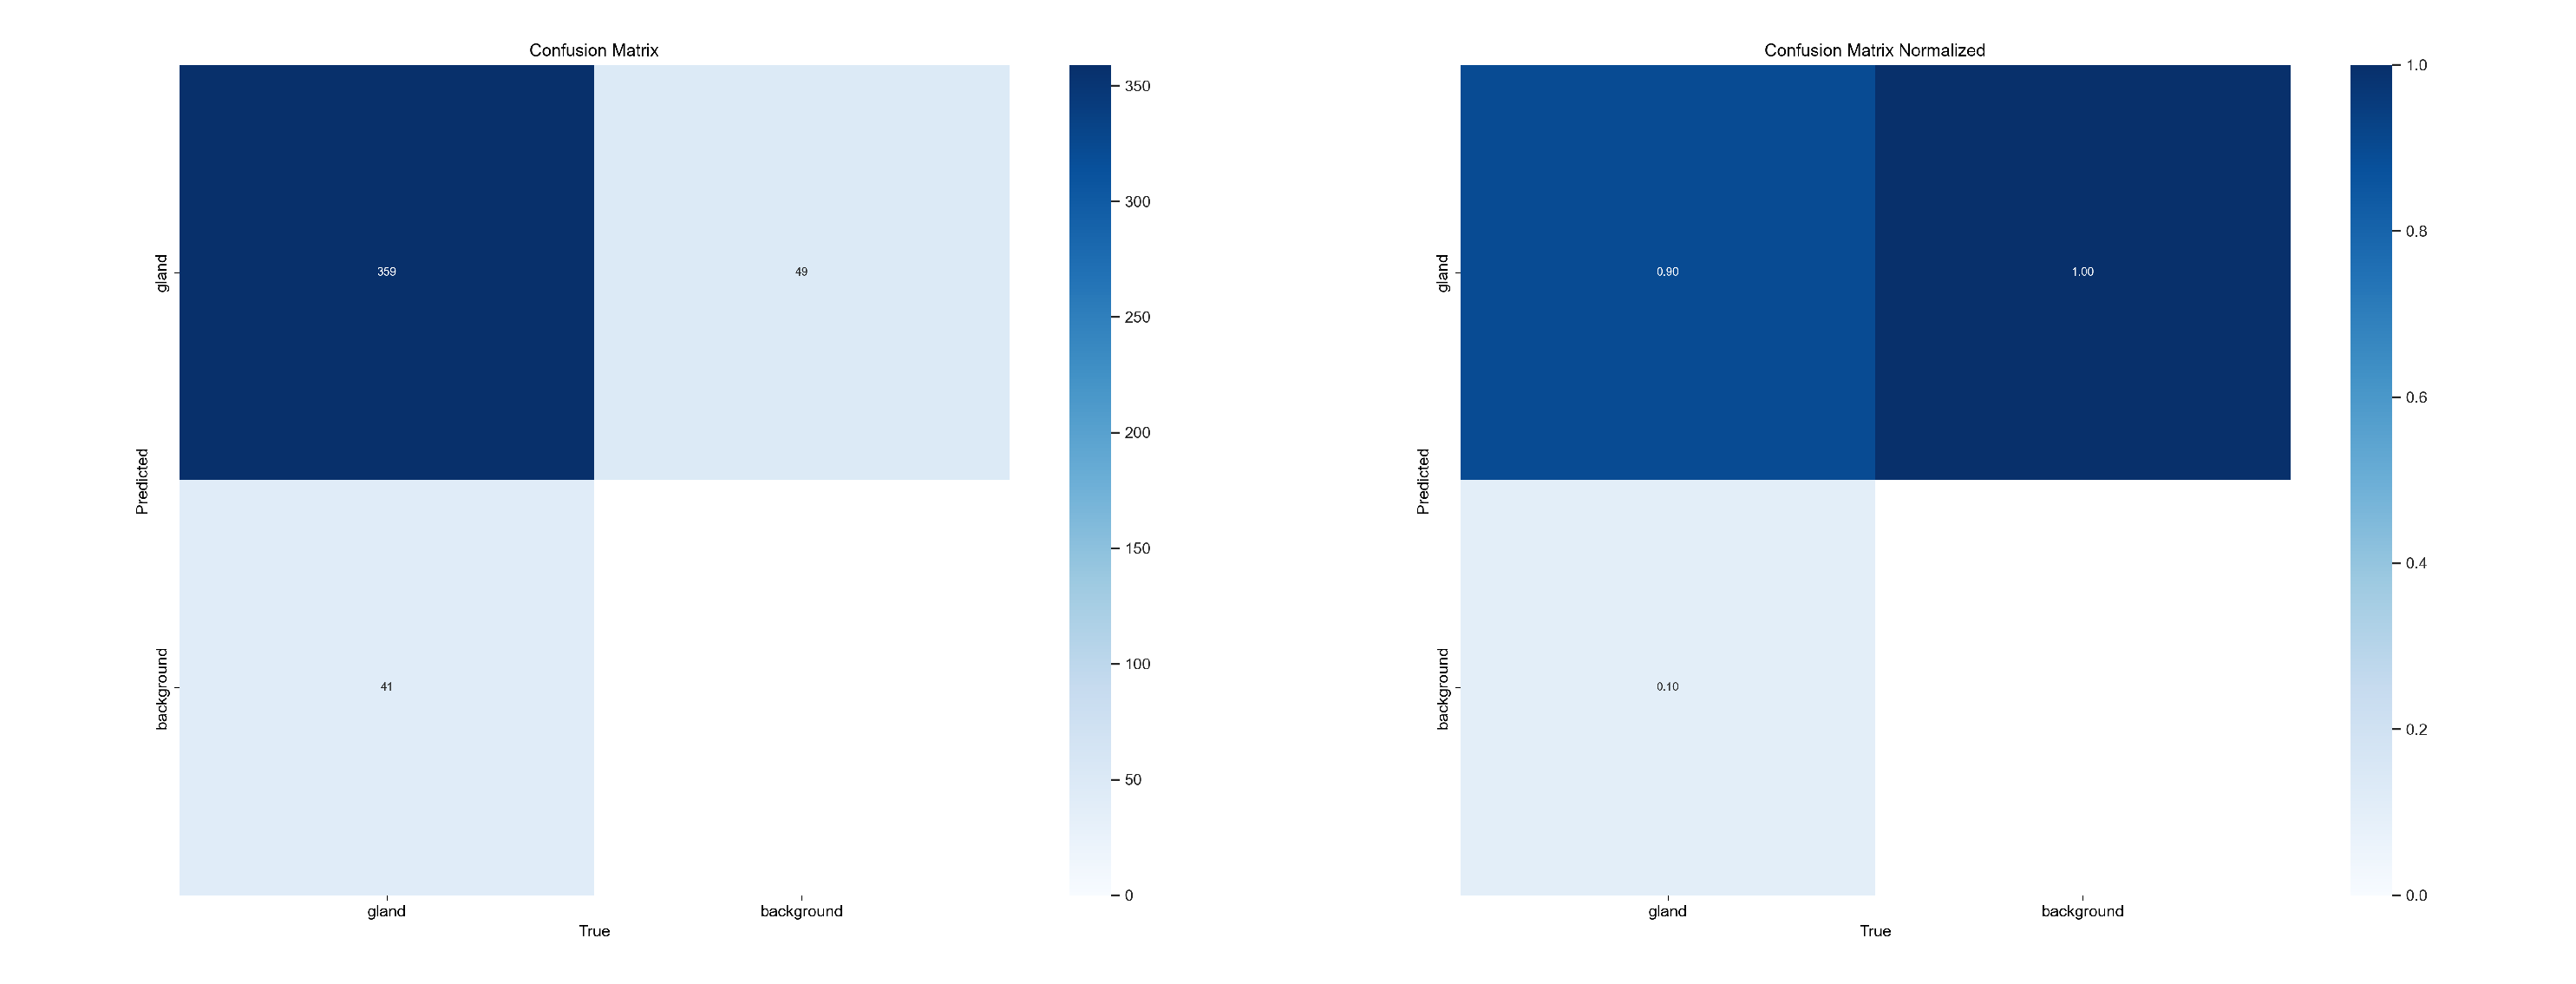

In [118]:
display_files(base_path,['confusion_matrix.png' ,'confusion_matrix_normalized.png'])
#display_files(base_path,['confusion_matrix_normalized.png'])

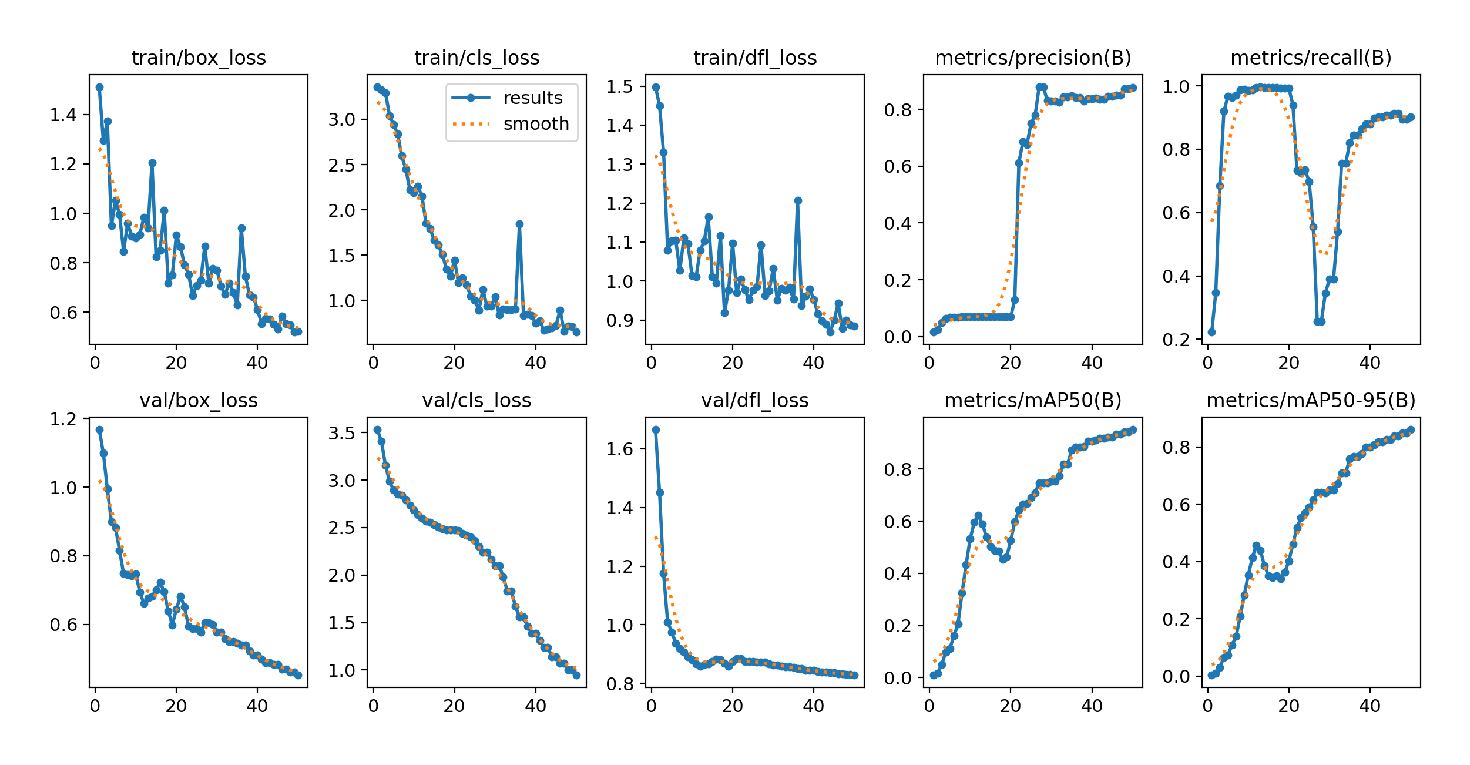

In [119]:
display_files(base_path,['results.png'])

In [122]:
img = Image.open("../preprocessedData/patient0Hsv.tif")
results = model(img, conf=0.05)


0: 640x640 80 glands, 118.3ms
Speed: 3.7ms preprocess, 118.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


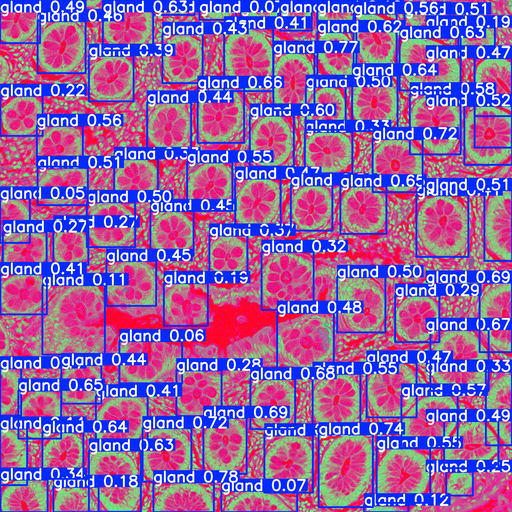

In [123]:
resized_img = plot_and_resize(results[0], 4)

# Model trainig with augumented Data #

In [68]:
run_name = "Glands_Finder_Augumented_Data"
base_path = f"runs/train/{run_name}"

In [69]:
model = YOLO("yolo11n.pt")
model.train(
    data='../preprocessedData/LearnSet/dataAugumented.yaml',
    epochs=100,
    imgsz=640,
    project="runs/train",
    name=run_name,
    exist_ok=True
)

New https://pypi.org/project/ultralytics/8.3.112 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.103  Python-3.12.4 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-12700H)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=../preprocessedData/LearnSet/dataAugumented.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=Glands_Finder_Augumented_Data, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

train: Scanning C:\Users\stszy\jupyterNoteBookNotes\cellDetector\preprocessedData\LearnSet\dataAugumented\labels\train.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\stszy\jupyterNoteBookNotes\cellDetector\preprocessedData\LearnSet\dataAugumented\labels\train.ca


Plotting labels to runs\train\Glands_Finder_Augumented_Data\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\train\Glands_Finder_Augumented_Data
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.061      3.147      1.224        319        640: 100%|██████████| 10/10 [00:40<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200     0.0689      0.982      0.159       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/100         0G      0.771      2.286     0.9763        272        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200     0.0698      0.994      0.583      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      3/100         0G     0.7859      1.581     0.9875        200        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200     0.0697      0.993       0.39      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      4/100         0G     0.7409       1.16     0.9541        242        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200     0.0683      0.973      0.652      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      5/100         0G        0.7     0.8666     0.9602        197        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<0

                   all        152       3200     0.0638      0.909       0.42      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      6/100         0G     0.6958     0.8175     0.9516        152        640: 100%|██████████| 10/10 [00:30<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<0

                   all        152       3200      0.959      0.765      0.917      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      7/100         0G     0.6552     0.7665     0.9427        211        640: 100%|██████████| 10/10 [00:30<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<0

                   all        152       3200      0.913      0.881      0.951      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      8/100         0G     0.6255     0.7324     0.9332        310        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<0

                   all        152       3200      0.882      0.891      0.936      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.6201     0.7123      0.927        147        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<0

                   all        152       3200      0.931      0.904      0.963      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     10/100         0G     0.6082     0.6576     0.9146        246        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.907        0.9      0.955      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     11/100         0G     0.6133     0.6562     0.9216        255        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<0

                   all        152       3200      0.928      0.902      0.964      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     12/100         0G     0.5879     0.6401     0.9097        270        640: 100%|██████████| 10/10 [00:29<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.941      0.932      0.978      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     13/100         0G     0.5522     0.6319     0.8988        317        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.916      0.951      0.973       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     14/100         0G      0.564      0.592     0.9034        278        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.952      0.955      0.982      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G       0.55     0.5768     0.9001        265        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<0

                   all        152       3200      0.941      0.967      0.979      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     16/100         0G     0.5432     0.5766     0.8951        255        640: 100%|██████████| 10/10 [00:32<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<0

                   all        152       3200      0.929      0.946      0.969      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     17/100         0G      0.562     0.5846     0.8982        224        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.927      0.953      0.969      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     18/100         0G     0.5608     0.5849     0.9009        346        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.909      0.938      0.968      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.5619     0.5829     0.9016        195        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.942      0.954      0.984      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     20/100         0G     0.5425     0.5408     0.8941        242        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200       0.93      0.953       0.98      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     21/100         0G     0.5515     0.5455     0.8958        236        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.932      0.969      0.982      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     22/100         0G     0.5449      0.541     0.8992        178        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.923      0.966      0.979      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     23/100         0G     0.5606     0.5378     0.8961        299        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.933      0.955       0.98      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.5687     0.5583     0.9152        165        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.963      0.966      0.989      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     25/100         0G     0.5424     0.5624      0.898        273        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.964      0.967      0.988      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     26/100         0G     0.5217     0.5231     0.8842        302        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.932      0.968       0.98       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     27/100         0G     0.5344     0.5229     0.8889        173        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.946      0.977      0.985      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     28/100         0G     0.5083     0.4968     0.8856        290        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.981      0.983      0.993      0.912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     29/100         0G     0.4955     0.4791     0.8753        242        640: 100%|██████████| 10/10 [00:30<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.981      0.989      0.994      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     30/100         0G     0.4985     0.4853     0.8703        224        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200       0.98      0.984      0.993      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     31/100         0G     0.4762     0.4593     0.8667        197        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.971      0.984      0.992      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     32/100         0G     0.4953     0.4698     0.8784        179        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.978      0.983      0.993      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      0.491     0.4722     0.8735        341        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.982       0.99      0.994      0.916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     34/100         0G     0.4794     0.4452       0.87        271        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.976      0.983      0.993       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     35/100         0G     0.4961     0.4641     0.8745        276        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.966      0.985      0.993      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     36/100         0G     0.4781     0.4539     0.8734        284        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.983      0.991      0.994       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     37/100         0G     0.4634     0.4333     0.8674        295        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.973      0.991      0.993       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     38/100         0G     0.4803      0.453     0.8722        210        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.963      0.973      0.991       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     39/100         0G     0.4822     0.4582     0.8707        120        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.964      0.974       0.99      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     40/100         0G     0.4621     0.4307     0.8657        253        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.986      0.985      0.993       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     41/100         0G     0.4573     0.4491     0.8623        294        640: 100%|██████████| 10/10 [00:29<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.991      0.989      0.992      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     42/100         0G     0.4704     0.4326     0.8707        305        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.985      0.985      0.994       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     43/100         0G      0.474      0.441     0.8709        183        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.988      0.987      0.994      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     44/100         0G     0.4843     0.4517     0.8668        383        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.993      0.989      0.994      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     45/100         0G     0.4697     0.4349     0.8676        270        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.987      0.993      0.995      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     46/100         0G     0.4684     0.4291     0.8641        277        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.989      0.992      0.994      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     47/100         0G      0.465     0.4294     0.8748        177        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.986      0.989      0.994      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.4633     0.4277     0.8697        197        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.986      0.991      0.994      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     49/100         0G     0.4649     0.4183     0.8699        182        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.984      0.993      0.994      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     50/100         0G     0.4641     0.4035     0.8693        211        640: 100%|██████████| 10/10 [00:29<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.981      0.992      0.994      0.935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     51/100         0G     0.4492     0.4016     0.8596        196        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200       0.98       0.99      0.994      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     52/100         0G      0.456     0.4137     0.8578        276        640: 100%|██████████| 10/10 [00:29<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<0

                   all        152       3200      0.976      0.988      0.992      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     53/100         0G     0.4387     0.4015     0.8618        296        640: 100%|██████████| 10/10 [00:32<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.992      0.992      0.994       0.94

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     54/100         0G     0.4568     0.4107     0.8669        326        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.994      0.994      0.995      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     55/100         0G     0.4492     0.4279     0.8714        111        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.996      0.996      0.995      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     56/100         0G     0.4432     0.4029     0.8454        272        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.994      0.994      0.995      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     57/100         0G     0.4488     0.4119     0.8667        140        640: 100%|██████████| 10/10 [00:30<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.991       0.99      0.995      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     58/100         0G     0.4413     0.4005      0.854        225        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.996      0.992      0.995       0.94

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     59/100         0G     0.4633     0.4076     0.8612        195        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.995      0.996      0.995      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     60/100         0G     0.4495      0.401     0.8639        116        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.994      0.999      0.995      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     61/100         0G     0.4293     0.3845     0.8519        171        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.995      0.996      0.995      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     62/100         0G      0.439     0.3858     0.8524        202        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.993      0.996      0.995      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     63/100         0G     0.4325     0.3795     0.8552        266        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.993      0.997      0.994      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     64/100         0G     0.4243     0.3781     0.8473        212        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.994      0.998      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.4379     0.3917     0.8669        268        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.995      0.997      0.995      0.952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     66/100         0G      0.416     0.3707     0.8503        245        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.998      0.998      0.995      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     67/100         0G     0.4272     0.3786     0.8506        274        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.997      0.999      0.995      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     68/100         0G     0.4275     0.3666     0.8436        312        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.997      0.997      0.995      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     69/100         0G     0.4259     0.3688     0.8583        244        640: 100%|██████████| 10/10 [00:25<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.998      0.998      0.995      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     70/100         0G     0.4319     0.3695     0.8601        155        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.996      0.995      0.995      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     71/100         0G      0.404     0.3432     0.8482        208        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.995      0.995      0.995      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     72/100         0G     0.4103     0.3623     0.8526        223        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.997      0.997      0.995      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     73/100         0G     0.4034     0.3538     0.8478        387        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.998      0.998      0.995      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     74/100         0G      0.417     0.3568     0.8535        133        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.997      0.998      0.995      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     75/100         0G     0.4142     0.3537     0.8419        212        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.999      0.999      0.995      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     76/100         0G     0.4055     0.3566     0.8454        193        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.999      0.999      0.995      0.958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     77/100         0G     0.4301     0.3683     0.8543        365        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1      0.999      0.995      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     78/100         0G     0.4144     0.3547     0.8518        222        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1      0.999      0.995      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     79/100         0G     0.3991     0.3456     0.8393        346        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1      0.998      0.995      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     80/100         0G     0.3926     0.3372     0.8386        269        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1      0.999      0.995      0.959

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     81/100         0G     0.4002      0.342     0.8395        200        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1          1      0.995      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     82/100         0G     0.3888     0.3437     0.8433        273        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1      0.999      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.3965     0.3413     0.8445        255        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.998      0.999      0.995      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     84/100         0G     0.3985     0.3373     0.8489        219        640: 100%|██████████| 10/10 [00:29<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.999          1      0.995      0.962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     85/100         0G     0.3858     0.3278     0.8399        266        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1          1      0.995       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     86/100         0G     0.3807     0.3271     0.8405        159        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1          1      0.995      0.963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     87/100         0G     0.4072     0.3463     0.8489        253        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200          1          1      0.995      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     88/100         0G     0.3884      0.332     0.8419        216        640: 100%|██████████| 10/10 [00:28<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1          1      0.995      0.964

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     89/100         0G      0.396     0.3302     0.8483        229        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1          1      0.995      0.965

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     90/100         0G     0.3847       0.33     0.8444        272        640: 100%|██████████| 10/10 [00:27<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1          1      0.995      0.958
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.3413      0.341     0.8207        204        640: 100%|██████████| 10/10 [00:24<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200          1          1      0.995      0.965

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     92/100         0G      0.331      0.316     0.8131        170        640: 100%|██████████| 10/10 [00:24<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200      0.998      0.998      0.995      0.967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     93/100         0G     0.3353     0.3277     0.8202        144        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.997      0.999      0.995      0.966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     94/100         0G     0.3273     0.3034     0.8088        199        640: 100%|██████████| 10/10 [00:25<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.999      0.999      0.995      0.968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     95/100         0G     0.3285      0.292     0.8143        219        640: 100%|██████████| 10/10 [00:25<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.999      0.999      0.995      0.968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     96/100         0G     0.3292     0.2949      0.811        122        640: 100%|██████████| 10/10 [00:26<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.999      0.999      0.995      0.971

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     97/100         0G     0.3153      0.291     0.8058        130        640: 100%|██████████| 10/10 [00:24<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.999          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.3177     0.2901     0.8086        148        640: 100%|██████████| 10/10 [00:24<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.999          1      0.995      0.971

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     99/100         0G      0.314     0.2873     0.8135        243        640: 100%|██████████| 10/10 [00:24<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<0

                   all        152       3200      0.999          1      0.995      0.972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    100/100         0G      0.314     0.2791     0.8103        180        640: 100%|██████████| 10/10 [00:24<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<0

                   all        152       3200          1          1      0.995      0.971

100 epochs completed in 1.284 hours.


Optimizer stripped from runs\train\Glands_Finder_Augumented_Data\weights\last.pt, 5.5MB
Optimizer stripped from runs\train\Glands_Finder_Augumented_Data\weights\best.pt, 5.5MB

Validating runs\train\Glands_Finder_Augumented_Data\weights\best.pt...
Ultralytics 8.3.103  Python-3.12.4 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-12700H)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<0


                   all        152       3200      0.999          1      0.995      0.972
Speed: 0.5ms preprocess, 41.6ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs\train\Glands_Finder_Augumented_Data


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000235B6A8F8F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [70]:
source_path = f"runs/train/{run_name}/weights/best.pt"
destination_path = f"saved_models/{run_name}_best.pt"

os.makedirs("saved_models", exist_ok=True)
shutil.copy(source_path, destination_path)

'saved_models/Glands_Finder_Augumented_Data_best.pt'

In [3]:
model = YOLO("saved_models/Glands_Finder_Augumented_Data_best.pt")

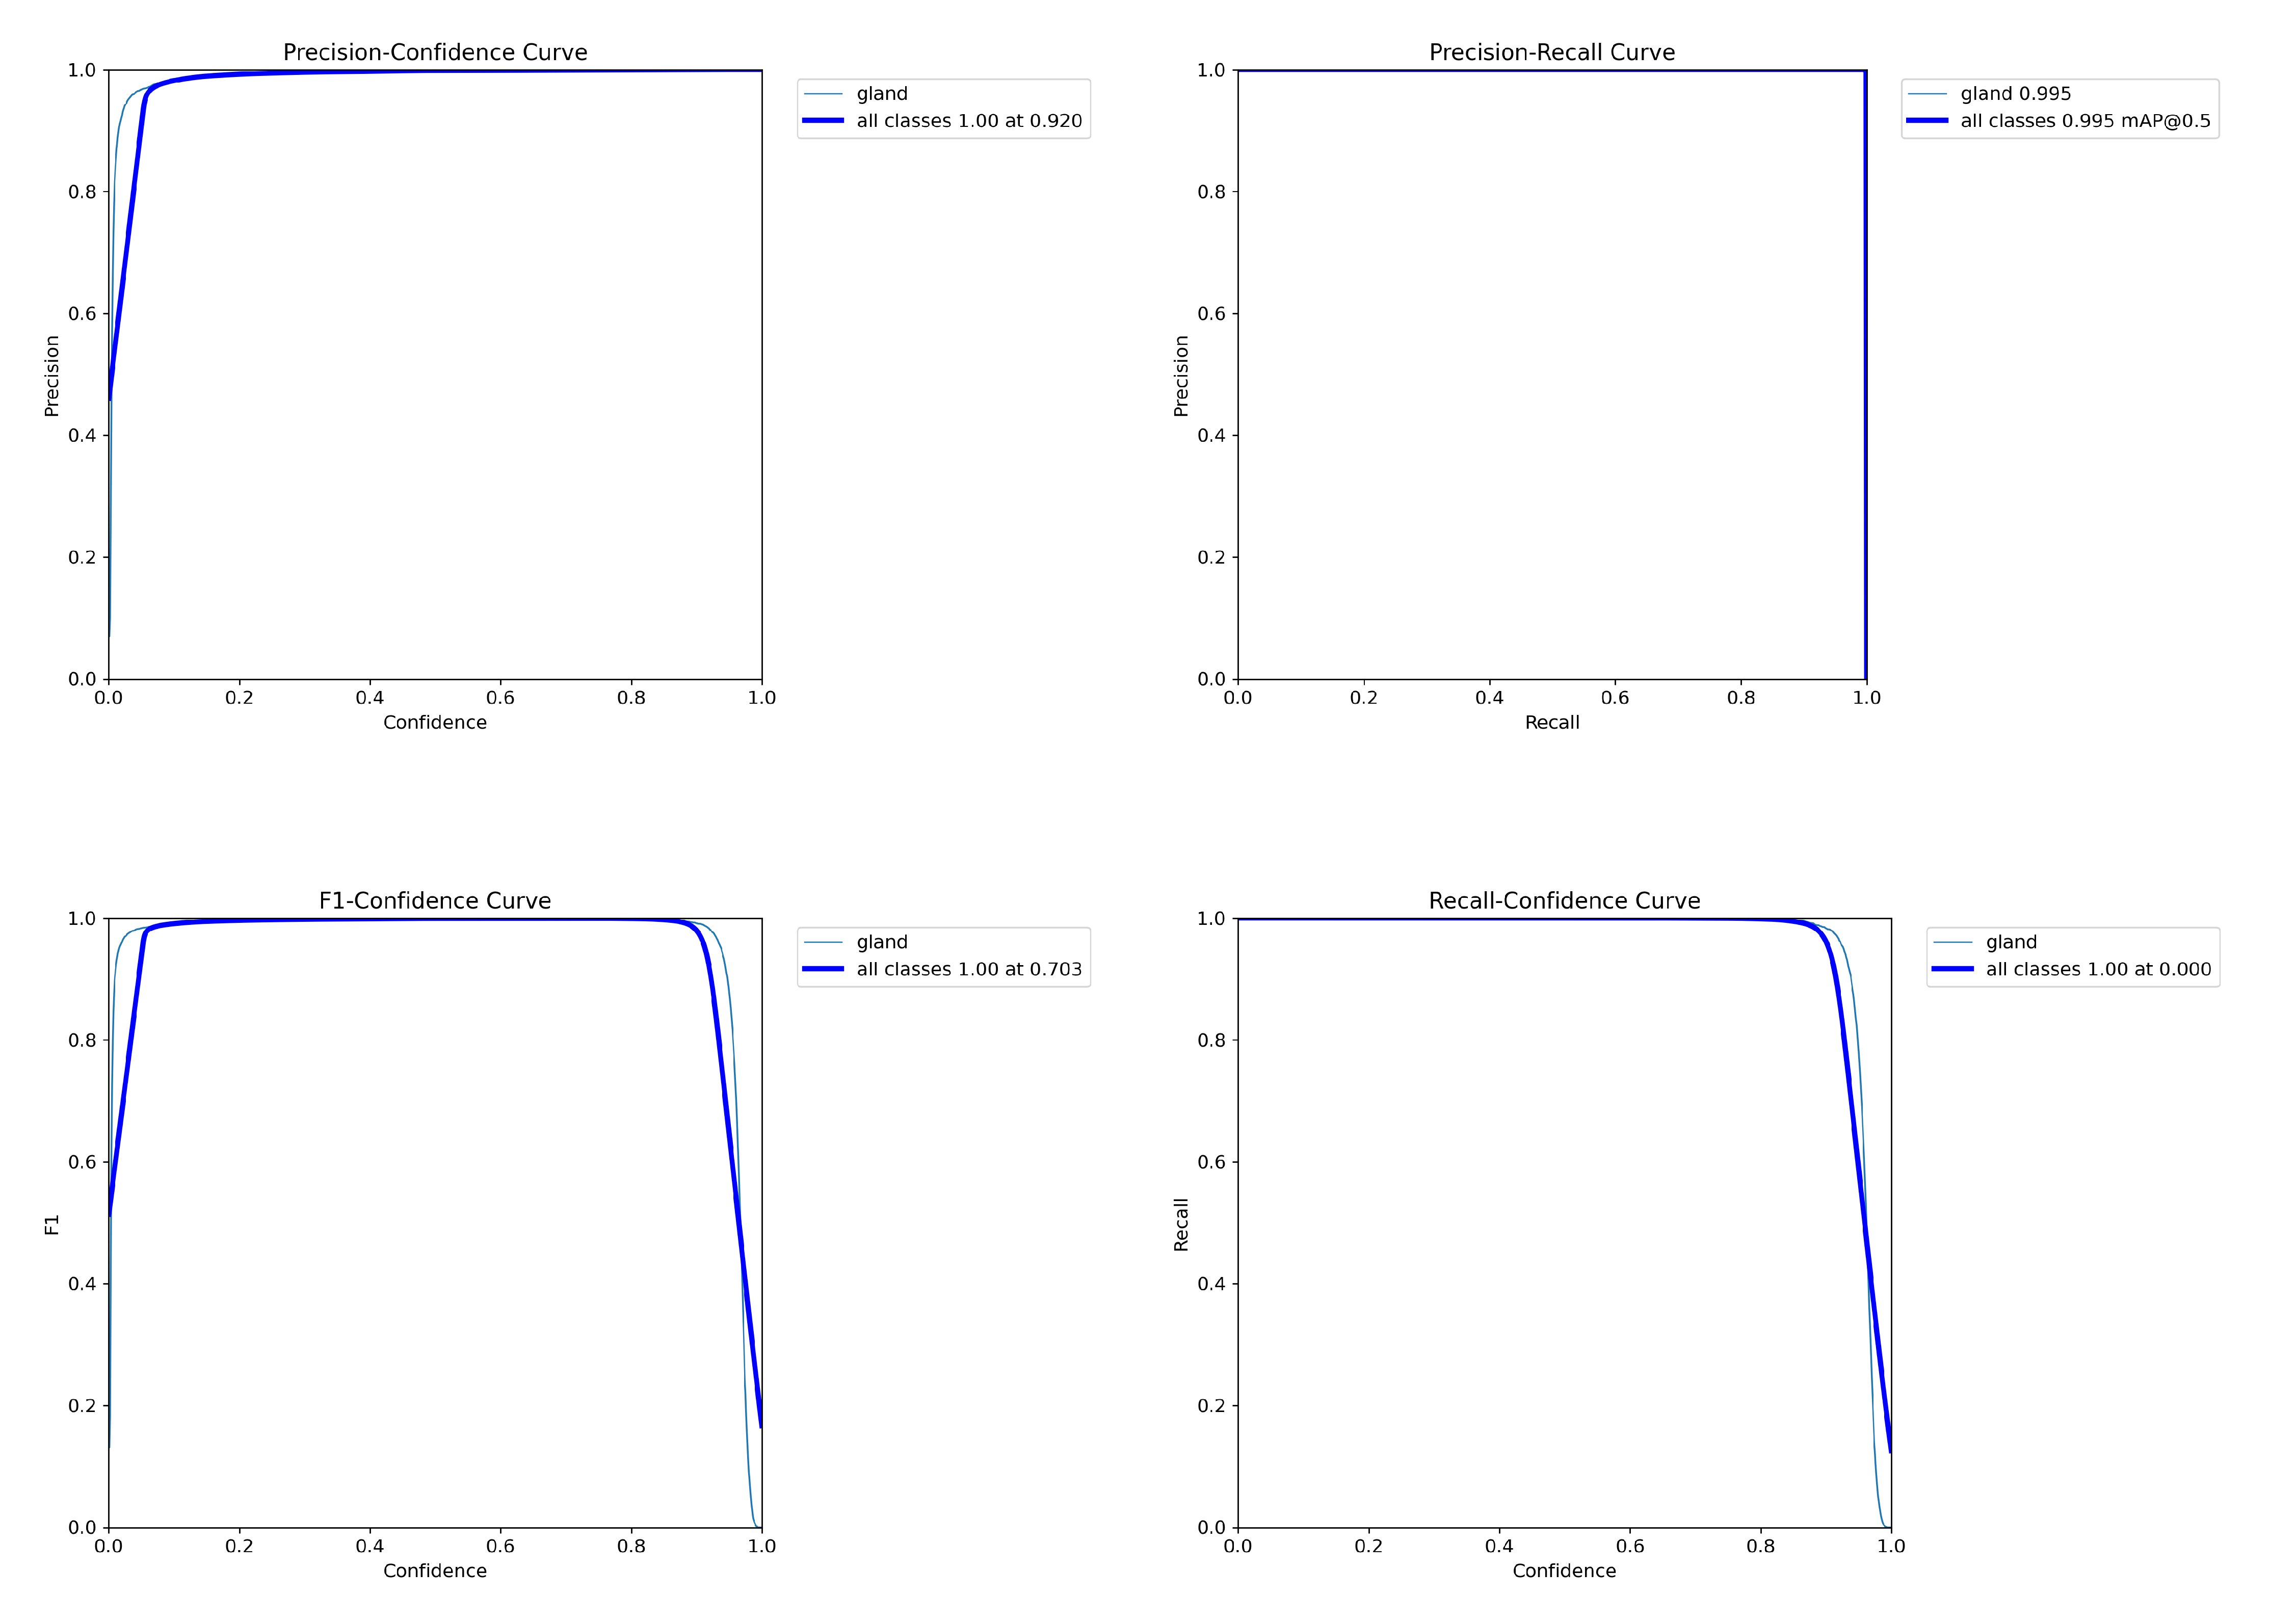

In [72]:
display_files(base_path,['P_curve.png', 'PR_curve.png', 'F1_curve.png', 'R_curve.png'])

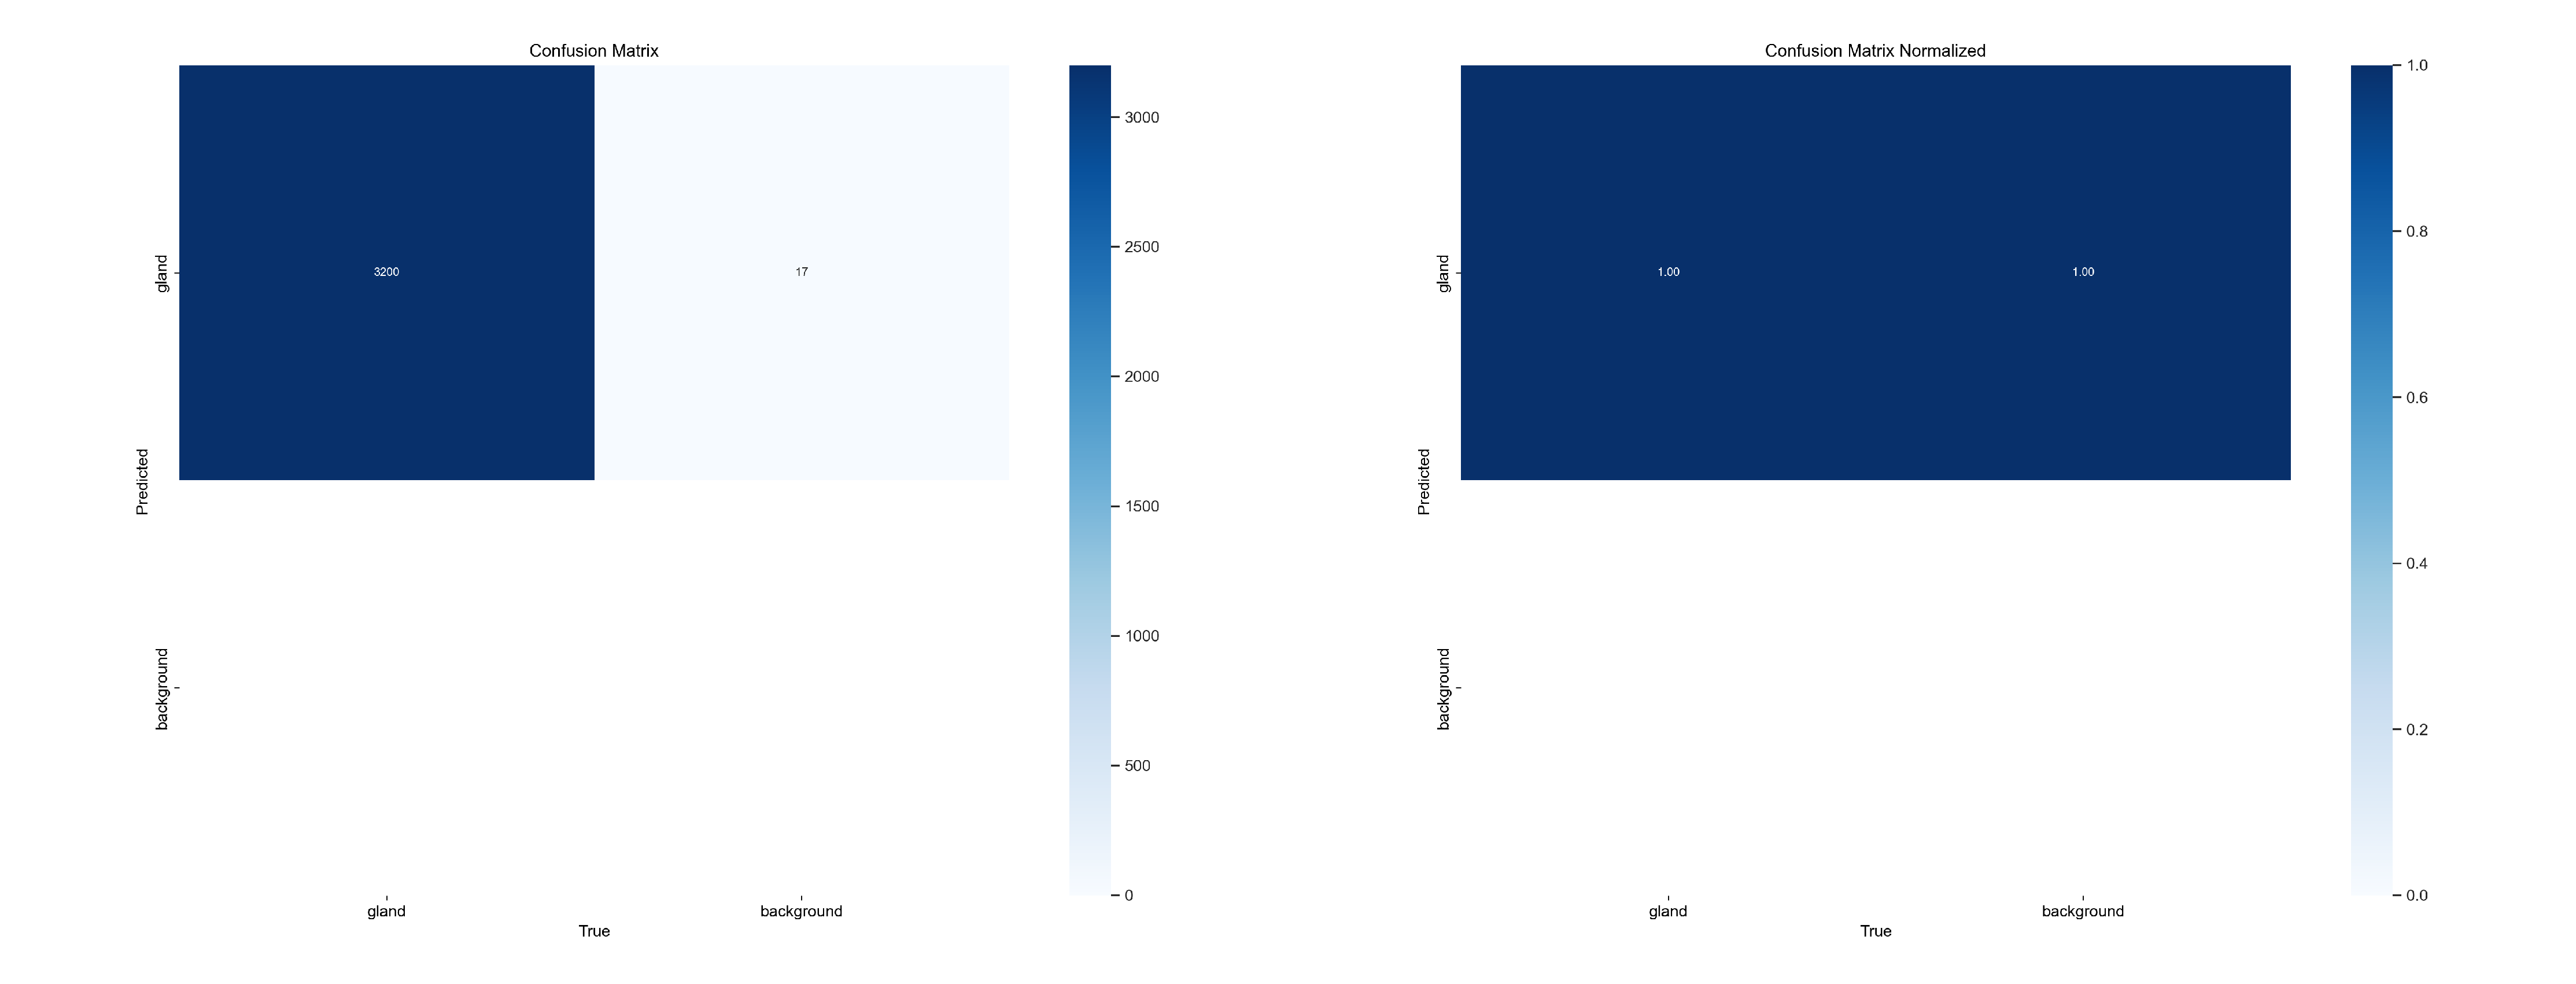

In [73]:
display_files(base_path,['confusion_matrix.png' ,'confusion_matrix_normalized.png'])
#display_files(base_path,['confusion_matrix_normalized.png'])

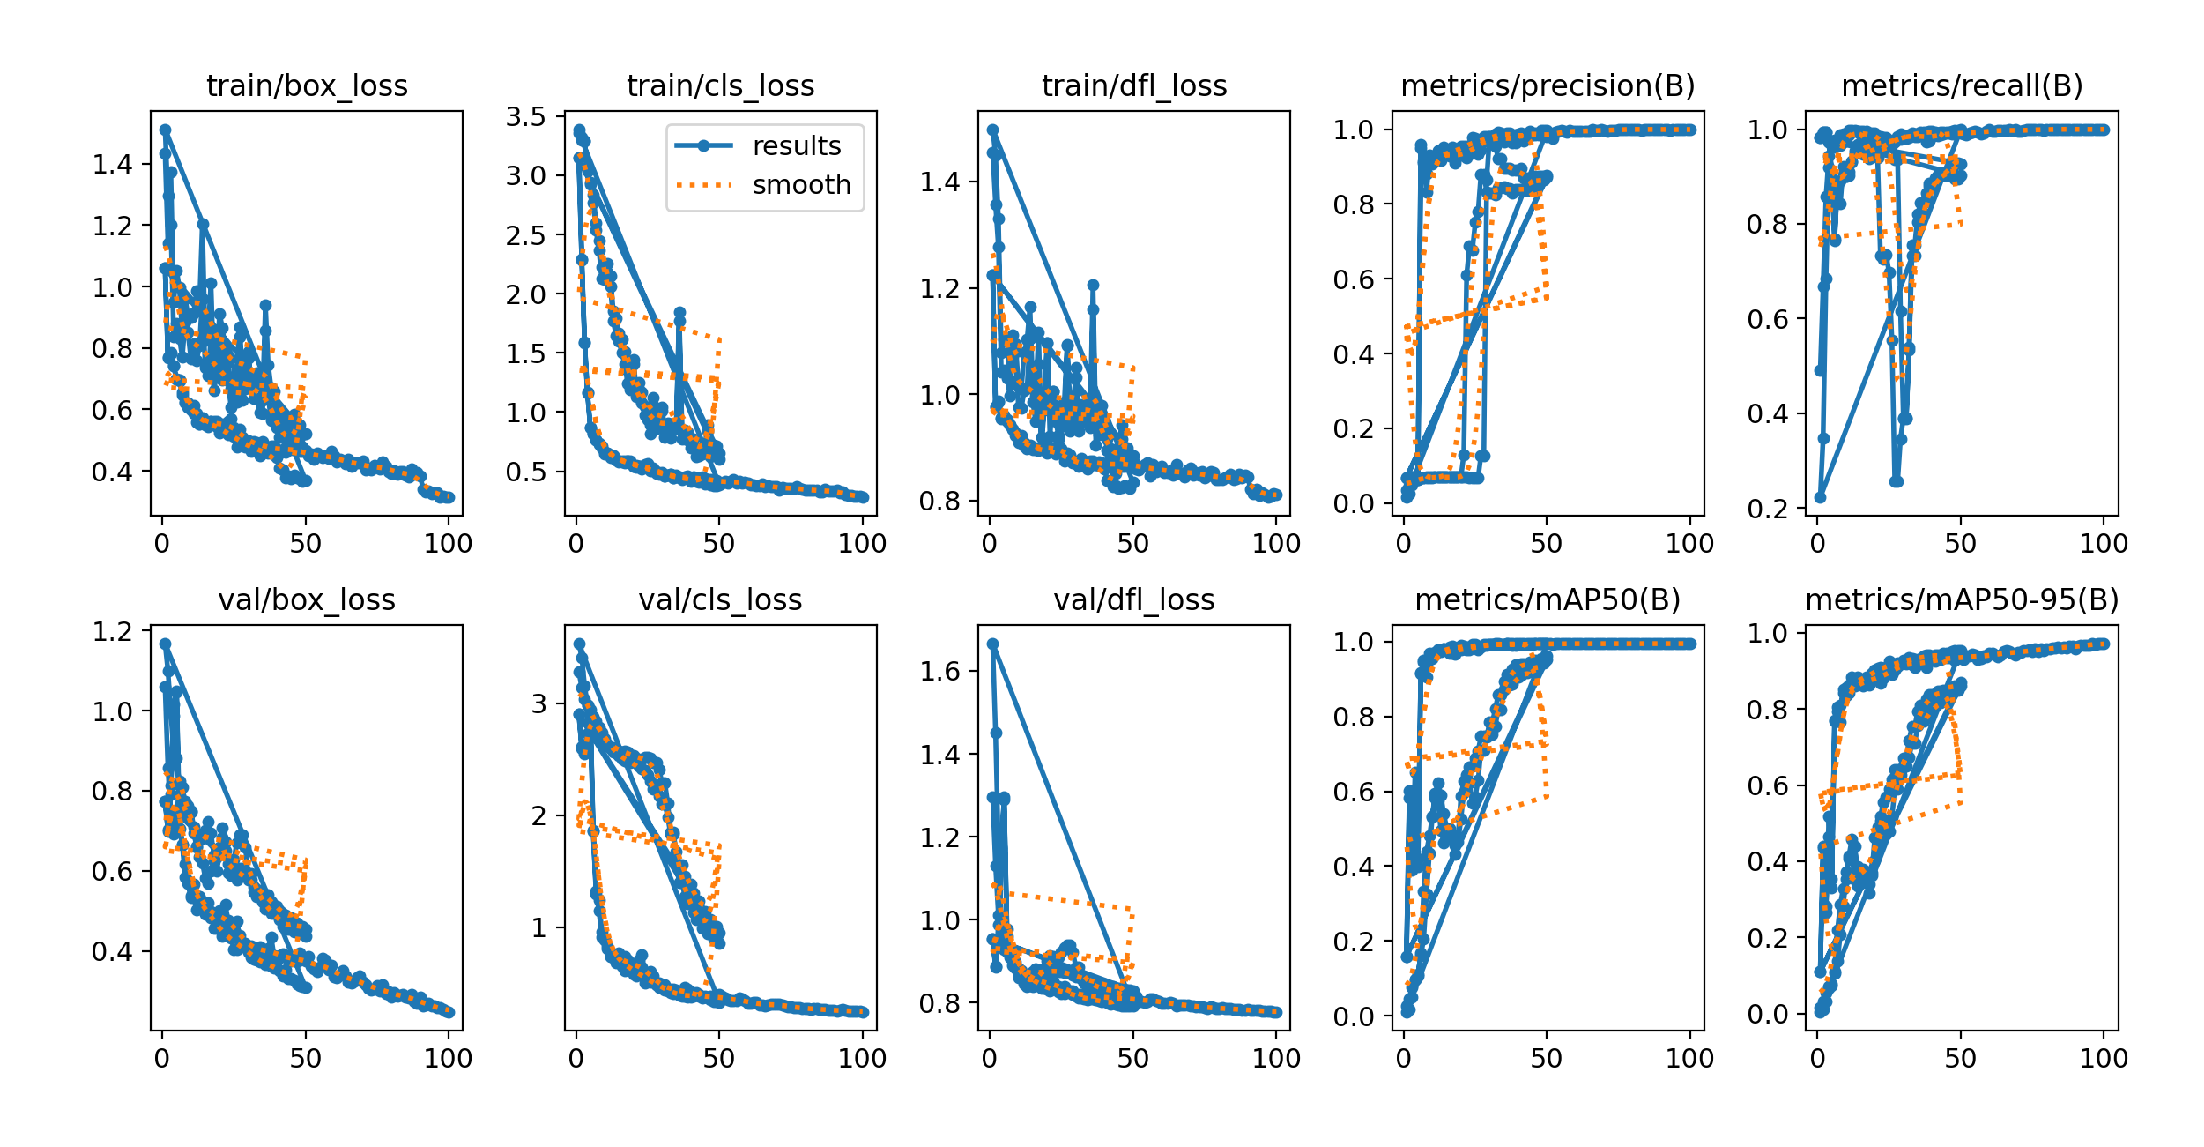

In [74]:
display_files(base_path,['results.png'])

In [4]:
img = Image.open("../preprocessedData/patient0.tif")
results = model(img, conf=0.05)

FileNotFoundError: [Errno 2] No such file or directory: '../preprocessedData/patient0.tif'

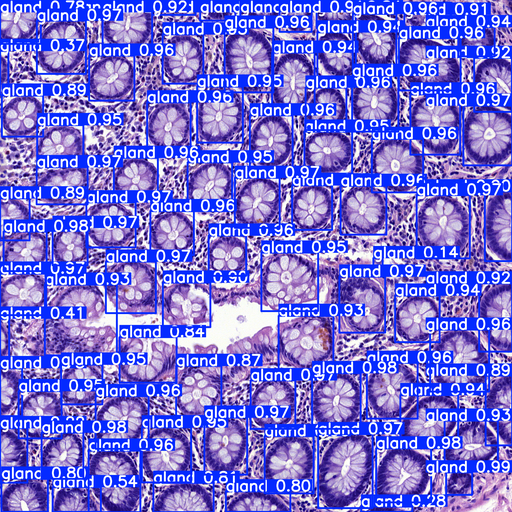

In [76]:
resized_img = plot_and_resize(results[0], 4)